# 0.0. IMPORTS

## 0.1. Libraries

In [1]:
import pandas as pd
import numpy as np

from IPython.display import Image

C:\Users\Lucas\AppData\Local\Temp\ipykernel_17424\2882472900.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 0.2. Functions

### 0.2.1. Get Attributes

In [2]:
def get_numerical_attributes(data):
    return data.select_dtypes(include=['int64', 'float64'])

In [3]:
def get_categorical_attributes(data):
    return data.select_dtypes(exclude=['int64', 'flaot64', 'datetime64[ns]'])

### 0.2.2. Get Descriptive Info

In [4]:
def get_descriptive_info(data):
    num_attributes = get_numerical_attributes(data)
    
    # Central Tendency - mean, median
    df_mean = pd.DataFrame(num_attributes.apply(np.mean)).T
    df_median = pd.DataFrame(num_attributes.apply(np.median)).T
    
    # Dipersion - std, min, max, range, skew, kurtosis
    df_std = pd.DataFrame(num_attributes.apply(np.std)).T
    df_min = pd.DataFrame(num_attributes.apply(min)).T
    df_max = pd.DataFrame(num_attributes.apply(max)).T
    df_range = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    df_skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    df_kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
    
    # min, max, range, median, std, skew, kurtosis
    df_descriptive_info = pd.concat([df_min, df_max, df_range,
                                     df_mean, df_median, df_std,
                                     df_skew, df_kurtosis]).T.reset_index()
    
    df_descriptive_info.columns = ['attributes', 'min', 'max',
                                   'range', 'mean', 'median',
                                   'std', 'skew', 'kurtosis']
    
    return df_descriptive_info

### 0.2.3. Analyze Outliers

In [5]:
def find_and_analyze_outliers(data):
    num_attributes = get_numerical_attributes(data)
    
    Q1 = num_attributes.quantile(0.25)
    Q3 = num_attributes.quantile(0.75)
    IQR = Q3 - Q1
    
    inf_lim = Q1 - 1.5 * IQR
    sup_lim = Q3 + 1.5 * IQR
    
    outliers = ((num_attributes < inf_lim) | (num_attributes > sup_lim))
    
    outliers_count = outliers.sum()
    outliers_percentage = (outliers_count / len(num_attributes)) * 100
    
    df_outliers = data[outliers.any(axis=1)]
    
    df_outliers_analyze = pd.DataFrame({
        'Outliers Count' : outliers_count,
        'Outliers Percentage' : outliers_percentage
    })
    
    df_outliers_analyze = df_outliers_analyze[df_outliers_analyze['Outliers Count'] > 0]
    
    df_outliers_analyze = df_outliers_analyze.sort_values(by='Outliers Count', ascending = False)
    
    return df_outliers, df_outliers_analyze

## 0.3. Loading Data

In [6]:
df_raw = pd.read_csv("../data/raw/teste_indicium_precificacao.csv")

## 0.4. Verifica nulo

In [7]:
def fillna_mode(group):
    if not group.dropna().empty:
        return group.fillna(group.mode().iloc[0])
    return group

# 1.0. DESCRIPTION DATA

In [8]:
df1 = df_raw.copy()

In [9]:
df1.sample(5).T

,37371,32722,48260,5574,8097
id,29661457,25781535,36168631,4053471,6246681
nome,Modern Spacious Room in Loft with Rooftop,Great private room in NYC 20 min to Manhattan,The coziest garden apartment in Harlem!!,Apartment in Heart of Greenpoint,Sun-Drenched Williamsburg Apartment
host_id,2930482,58234433,4169722,3967335,27428499
host_name,Ashley,Martin,Jophiel,Molly,Allyssa
bairro_group,Queens,Queens,Manhattan,Brooklyn,Brooklyn
bairro,Ridgewood,Sunnyside,Harlem,Greenpoint,Williamsburg
latitude,40.70177,40.73692,40.80637,40.72607,40.71475
longitude,-73.89797,-73.91967,-73.94282,-73.95103,-73.93782
room_type,Private room,Private room,Entire home/apt,Private room,Entire home/apt
price,75,89,100,65,190


## 1.1. Data Dimension

In [10]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Features: {df1.shape[1]}')

Number of Rows: 48894
Number of Features: 16


## 1.2. Data Types

In [11]:
df1.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

## 1.3. Check Duplicated

In [12]:
df1.duplicated().sum()

0

## 1.4. Check NA

In [13]:
df1.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

### 1.4.1. nome

Cada row nulo receberá, respectivamente, a junção dos dados em host_name + bairro_group + bairro no seu campo.

In [14]:
aux1 = df1[df1['nome'].isna()]

aux1[['host_name', 'bairro_group', 'bairro']].groupby('host_name').count()

,bairro_group,bairro
host_name,,
Andrea,1,1
Anna,1,1
Carolina,1,1
Huei-Yin,1,1
Jeff,1,1
Jesse,1,1
Jonathan,1,1
Josh,1,1
Juliette,1,1


### 1.4.2. host_name
Cada row nulo receberá, respectivamente, o dado do row nome.

In [15]:
aux2 = df1[df1['host_name'].isna()]

aux2['nome'].duplicated().any()

False

### 1.4.3. ultima_review e reviews_por_mes
Ambas as colunas tem respectivamente 10.052 dados nulos, nas mesmas posições, o que **equivale a aproximadamente 20.56%** do total dos dados. Isso sem considerar a destribuição os dados dentro desses 20.56%, onde por exemplo, pode haver 90% dos dados do Bronx.

In [16]:
# Onde é nulo em ultima_review também é em reviews_por_mes
df1['ultima_review'].isna().equals(df1['reviews_por_mes'].isna())

True

In [17]:
# A quantidade de dados onde o numero_de_reviews é igual a 0 é a mesma referente a dados nulos em ultima_review e reviews_por_mes
df1[df1['numero_de_reviews'] == 0].shape

(10052, 16)

In [18]:
# Onde os dados de ultima_review e reviews_por_mes são nulos, os dados são igual a 0. Confirmando que nunca houve aluguel desses imoveis.
aux= df1[df1['ultima_review'].isna()]
aux['numero_de_reviews'].unique()

array([0], dtype=int64)

In [19]:
# Data mais antiga dos dados
pd.to_datetime(df1['ultima_review']).min()

Timestamp('2011-03-28 00:00:00')

In [20]:
# menor valjor atribuido a review_por_mes
df1['reviews_por_mes'].min()

0.01

## 1.5. Tratamento de nulos

In [21]:
# nome
df1['nome'] = df1.apply(lambda x: f"{x['host_name']}  {x['bairro_group']} {x['bairro']}" if pd.isna(x['nome']) else x['nome'], axis=1)

# host_name
df1['host_name'] = df1.apply(lambda x: x['nome'] if pd.isna(x['host_name']) else x['host_name'], axis=1)

# ultima_review
df1['ultima_review'] = df1.groupby('bairro_group')['ultima_review'].transform(fillna_mode)
df1['ultima_review'] = pd.to_datetime(df1['ultima_review'])

# reviews_por_mes
df1['reviews_por_mes'] = df1.apply(lambda x: -1 if pd.isna(x['reviews_por_mes']) else x['reviews_por_mes'], axis=1)

In [22]:
df1.isna().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

## 1.6. Data Descriptive Info

In [23]:
get_descriptive_info(df1)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,2595.00000,3.648724e+07,3.648465e+07,1.901753e+07,1.967743e+07,1.098277e+07,-0.090265,-1.227738
1,host_id,2438.00000,2.743213e+08,2.743189e+08,6.762139e+07,3.079553e+07,7.861037e+07,1.206189,0.169041
2,latitude,40.49979,4.091306e+01,4.132700e-01,4.072895e+01,4.072308e+01,5.452883e-02,0.237157,0.148937
3,longitude,-74.24442,-7.371299e+01,5.314300e-01,-7.395217e+01,-7.395568e+01,4.615665e-02,1.284179,5.021498
4,price,0.00000,1.000000e+04,1.000000e+04,1.527208e+02,1.060000e+02,2.401542e+02,19.118743,585.660822
5,minimo_noites,1.00000,1.250000e+03,1.249000e+03,7.030085e+00,3.000000e+00,2.051053e+01,21.827092,854.056640
6,numero_de_reviews,0.00000,6.290000e+02,6.290000e+02,2.327476e+01,5.000000e+00,4.455054e+01,3.690589,19.529325
7,reviews_por_mes,-1.00000,5.850000e+01,5.950000e+01,8.853403e-01,3.700000e-01,1.778533e+00,2.452605,28.687688
8,calculado_host_listings_count,1.00000,3.270000e+02,3.260000e+02,7.144005e+00,1.000000e+00,3.295252e+01,7.933091,67.549426
9,disponibilidade_365,0.00000,3.650000e+02,3.650000e+02,1.127762e+02,4.500000e+01,1.316173e+02,0.763459,-0.997430


## 1.7. Find and Analyze Outliers

In [24]:
df_outliers, df_outliers_analyze = find_and_analyze_outliers(df1)

In [25]:
df_outliers_analyze

,Outliers Count,Outliers Percentage
calculado_host_listings_count,7080,14.480304
minimo_noites,6607,13.512905
numero_de_reviews,6021,12.314394
reviews_por_mes,3312,6.773837
price,2972,6.078455
longitude,2832,5.792122
host_id,1526,3.121037
latitude,425,0.869227


## 1.8. Saved Actual Data

In [26]:
path = '..\data\processed\df1_description_data.csv'
df1.to_csv(path, index=False)

# 2.0. FEATURE ENGINEERING

In [27]:
df2 = df1.copy()

In [28]:
df2.sample(5).T

,5088,35499,33030,2100,39223
id,3659544,28179447,26057084,955542,30584054
nome,Home Away from Home-Room in Midtown,"A COZY COMFY ROOM NEAR THE BEACH,STORES AND JFK",Spacious 1 Bd. Duplex Apt. in Brownstone,*Sunny Master BD* in Garden Duplex,Sunny private room in the heart of Brooklyn.
host_id,12327430,212834813,36440514,4932354,104813064
host_name,Marco,Olayode,Sarah,Mitty,Kate
bairro_group,Manhattan,Queens,Brooklyn,Brooklyn,Brooklyn
bairro,Hell's Kitchen,Arverne,Clinton Hill,Prospect Heights,Kensington
latitude,40.76625,40.59194,40.68553,40.67942,40.64637
longitude,-73.99387,-73.8,-73.96314,-73.97078,-73.97593
room_type,Private room,Private room,Entire home/apt,Private room,Private room
price,69,50,150,97,56


In [29]:
# ano
df2['ano'] = df2['ultima_review'].dt.year

# mes
df2['mes'] = df2['ultima_review'].dt.month

# dia
df2['dia'] = df2['ultima_review'].dt.day

# semana do ano
df2['semana_do_ano'] = df2['ultima_review'].dt.isocalendar().week

# ano_semana
df2['ano_semana'] = df2['ultima_review'].dt.strftime('%Y-%W')

# bairro
bairro_media = df2.groupby('bairro')['price'].mean()
df2['bairro_media'] = df2['bairro'].map(bairro_media)

# bairro_group_media
bairro_group_media = df2.groupby('bairro_group')['price'].mean()
df2['bairro_group_media'] = df2['bairro_group'].map(bairro_group_media)

# encontra a semana do ano com o maior numero de aluguéis para os bairros
df2['bairro_semana_pico_aluguel'] = df2.groupby('bairro')['semana_do_ano'].transform(lambda x: x.mode().iloc[0])

# encontra a semana do ano com o maior número de aluguéis para cada bairro
df2['bairro_group_semana_pico_aluguel'] = df2.groupby('bairro_group')['semana_do_ano'].transform(lambda x: x.mode().iloc[0])

# encontra o room_type mais comum nos bairros
df2['room_type_bairro'] = df2.groupby('bairro')['room_type'].transform(lambda x: x.mode().iloc[0])

# encontra o room_type mais comum nos bairros_group
df2['room_type_bairro_group'] = df2.groupby('bairro_group')['room_type'].transform(lambda x: x.mode().iloc[0])

# encontre a quantidade minima de noite para alguel mais comum por bairro
df2['minimo_noites_bairro'] = df2.groupby('bairro')['minimo_noites'].transform(lambda x: x.mode().iloc[0])

# encontre a quantidade minima de noite para alguel mais comum por bairro_group
df2['minimo_noites_bairro_group'] = df2.groupby('bairro_group')['minimo_noites'].transform(lambda x: x.mode().iloc[0])

In [30]:
df2.sample(5).T

,22705,41955,8317,33431,6754
id,18375246,32611643,6397592,26425032,4840794
nome,Private Room in Clinton Hill,TRENDi Artistic Duplex with Backyard Sleeps 10ppl,Lower East Side/Chinatown Bedroom,Private Room in apartment (1),1 Bedroom Apt. in Nolita/Chinatown
host_id,127250455,15034908,2696970,198478845,24833732
host_name,Laura,Trendi,Sasha,Jelani,Bobby
bairro_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
bairro,Bedford-Stuyvesant,Harlem,Two Bridges,Clinton Hill,Little Italy
latitude,40.69234,40.80782,40.71193,40.6867,40.71763
longitude,-73.95993,-73.94132,-73.99454,-73.9612,-73.99753
room_type,Private room,Entire home/apt,Private room,Private room,Entire home/apt
price,54,278,99,59,160


## 2.1 Saved Actual Data

In [31]:
path = '..\data\processed\df2_description_data.csv'
df2.to_csv(path, index=False)

# 3.0. Variable Filtering

Optei por não remover, até então, nenhuma coluna do dataset. 

In [32]:
df3 = df2.copy()

In [33]:
df3.head().T

,0,1,2,3,4
id,2595,3647,3831,5022,5099
nome,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East
host_id,2845,4632,4869,7192,7322
host_name,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris
bairro_group,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan
bairro,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill
latitude,40.75362,40.80902,40.68514,40.79851,40.74767
longitude,-73.98377,-73.9419,-73.95976,-73.94399,-73.975
room_type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt
price,225,150,89,80,200


## 3.1. Saved Actual Data

In [34]:
path = '..\data\processed\df3_description_data.csv'
df3.to_csv(path, index=False)

# 4.0. HIPOTESES INSIGHTS

In [35]:
df4 = df3.copy()

In [36]:
df4.sample(5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,...,semana_do_ano,ano_semana,bairro_media,bairro_group_media,bairro_semana_pico_aluguel,bairro_group_semana_pico_aluguel,room_type_bairro,room_type_bairro_group,minimo_noites_bairro,minimo_noites_bairro_group
32205,25188064,Beautiful Cozy Apt near Subway - Historic Broo...,11501956,Karine,Brooklyn,Bedford-Stuyvesant,40.68273,-73.91651,Entire home/apt,150,...,26,2019-25,107.678244,124.381983,25,25,Private room,Private room,2,2
42863,33275808,Large Charming 1-Bedroom apt in Brownstone,233881237,Marietta,Brooklyn,Fort Greene,40.68562,-73.96977,Entire home/apt,125,...,25,2019-24,151.374233,124.381983,25,25,Entire home/apt,Private room,2,2
8812,6761717,Brooklyn Heights Brownstone Duplex,1549503,Alison,Brooklyn,Brooklyn Heights,40.69009,-73.99355,Entire home/apt,195,...,26,2015-25,209.064935,124.381983,25,25,Entire home/apt,Private room,2,2
31796,24805348,Bright Room in Williamsburg,187530856,Baris,Brooklyn,Williamsburg,40.70896,-73.94754,Private room,157,...,43,2018-43,143.802806,124.381983,25,25,Private room,Private room,2,2
36059,28658564,Perfectly located UWS - Cool Clean studio,196211856,Tarun,Manhattan,Upper West Side,40.77771,-73.98023,Entire home/apt,145,...,18,2019-17,210.918316,196.875814,25,25,Entire home/apt,Entire home/apt,1,1


## 4.1. Hipoteses Mind Map

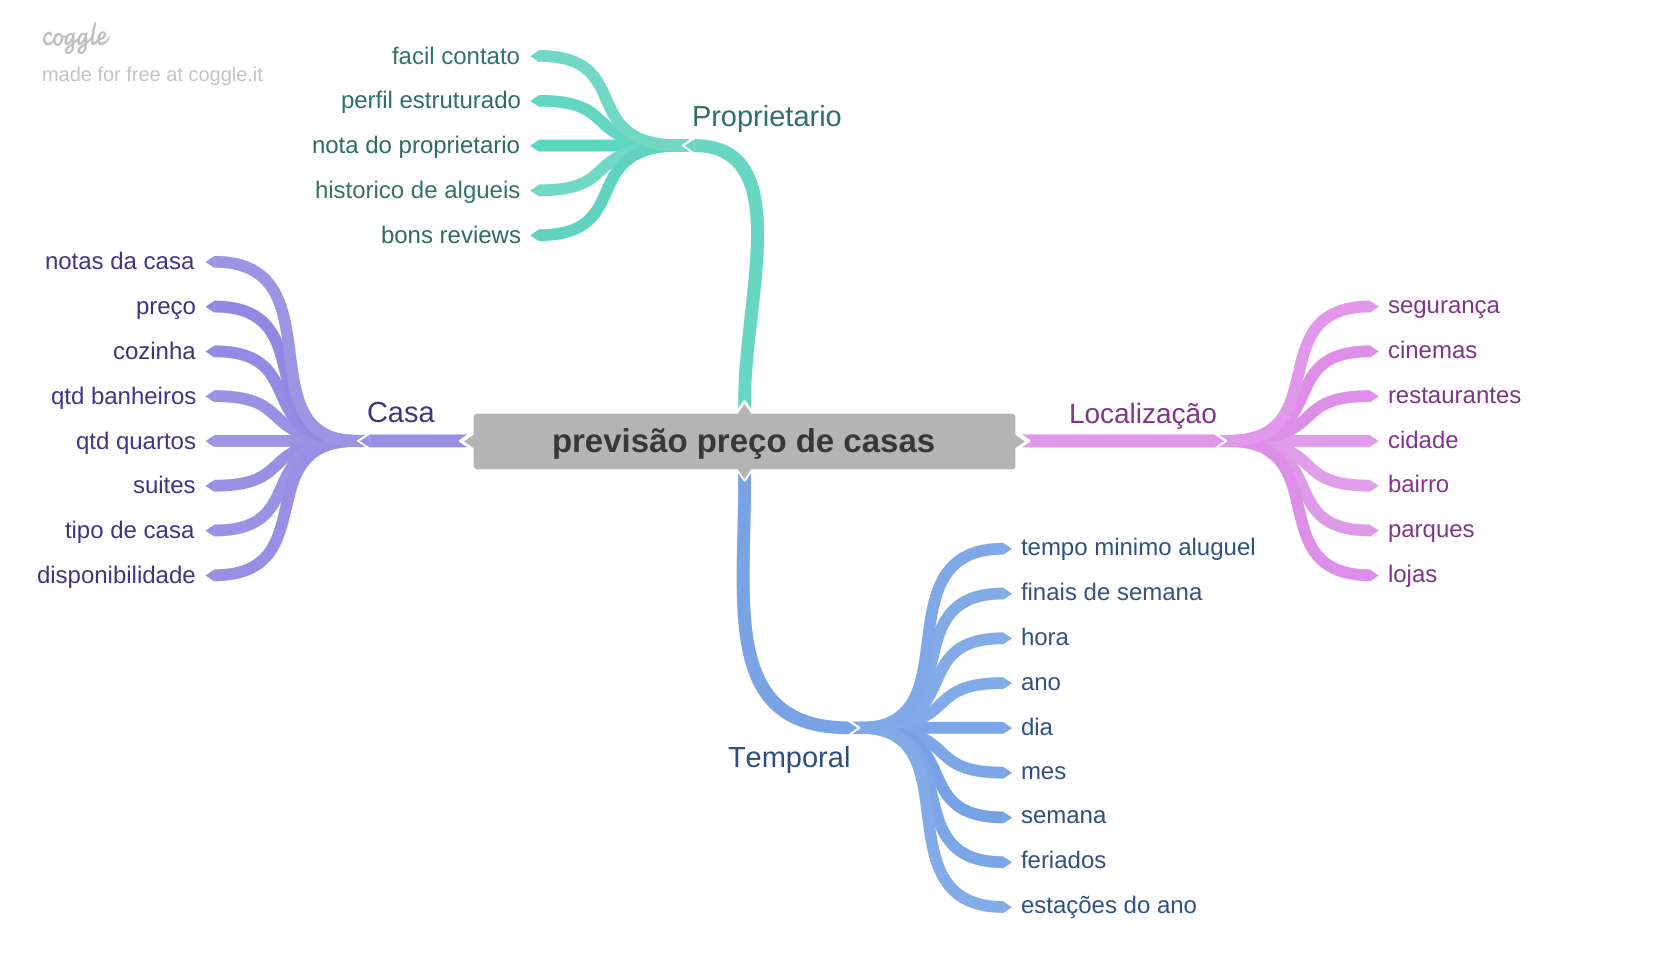

In [37]:
Image('../img/mind_map_preco_casa.png')

## 4.2. Criação de Hipóteses

### 4.2.1. Temporal

1. O preço das casas alugadas em periodo de feriados é mais alto
2. O preço das casas alugadas no inverno é mais caro
3. O preço medio da diaria da casa é maior em casas com menores dias minimos de alugueis
4. O preço das casas aumenta com o passar dos anos

### 4.2.2. Casa

1. Quantidade de quartos aumenta o preço da casa
2. Casas com menor tempo de disponibilidade, tem o preço maior
3. Apartamentos inteiros são mais caros que os outros tipos de casas
4. Casas com o menor preço são mais alugadas
5. Casas com maior quantidade de reviews tem preços maiores

### 4.2.3. Localização

1. Manhatam é o bairro mais caro
2. O tipo de casa menos comum no bairro tem o maior preço
3. Casas mais proximas a parques são mais caras
4. Bairros mais seguros tem casas mais caras
5. Bairros com maior quantidade de lojas, tem casas mais caras

## 4.3. Final List Hypotheses

1. O preço das casas alugadas em periodo de feriados é mais alto
2. O preço das casas alugadas no inverno é mais caro
3. O preço medio da diaria da casa é maior em casas com menores dias minimos de alugueis
4. O preço das casas aumenta com o passar dos anos
5. Quantidade de quartos aumenta o preço da casa
6. Casas com menor tempo de disponibilidade, tem o preço maior
7. Apartamentos inteiros são mais caros que os outros tipos de casas
8. Casas com o menor preço são mais alugadas
9. Casas com maior quantidade de reviews tem preços maiores
10. Manhatam é o bairro mais caro
11. O tipo de casa menos comum no bairro tem o maior preço
12. Casas mais proximas a parques são mais caras
13. Bairros mais seguros tem casas mais caras
14. Bairros com maior quantidade de lojas, tem casas mais caras


## 4.4. Saved Actual Data

In [38]:
path = '..\data\processed\df4_description_data.csv'
df4.to_csv(path, index=False)